In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [3]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.50.post1', '1.0.1.post2')

In [4]:
torch.cuda.set_device(0)

In [5]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-odia/language-model')

In [9]:
p = path.glob('OriyaWikipediaArticles/*')
files = [x for x in p if x.is_file()]

In [10]:
len(files)

17781

In [8]:
train_files, test_files = train_test_split(files, test_size=0.3)

In [9]:
len(train_files), len(test_files)

(12446, 5335)

In [10]:
train_files[0]

PosixPath('/home/gaurav/PycharmProjects/nlp-for-oriya/language-model/OriyaWikipediaArticles/2403.pkl')

In [11]:
str(train_files[0]).split('/')[-1][:-4]

'2403'

In [12]:
# Preparing dataset for fastai
for file in train_files:
    with open(file, 'rb') as f:
        text = pickle.load(f)
    with open(path/'OriyaDataset'/'train'/(str(file).split('/')[-1][:-4]+'.txt'), "w") as text_file:
        text_file.write(text)

In [13]:
for file in test_files:
    with open(file, 'rb') as f:
        text = pickle.load(f)
    with open(path/'OriyaDataset'/'valid'/(str(file).split('/')[-1][:-4]+'.txt'), "w") as text_file:
        text_file.write(text)

In [6]:
from inltk.tokenizer import OriyaTokenizer

In [7]:
OriyaTokenizer

inltk.tokenizer.OriyaTokenizer

In [8]:
# class OriyaTokenizer(BaseTokenizer):
#     def __init__(self, lang:str):
#         self.lang = lang
#         self.sp = spm.SentencePieceProcessor()
#         self.sp.Load(str(path/"../tokenizer/oriya_lm.model"))
        
#     def tokenizer(self, t:str) -> List[str]:
#         return self.sp.EncodeAsPieces(t)

In [9]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/oriya_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(15000)]

In [16]:
itos

['<unk>',
 '<s>',
 '</s>',
 '▁।',
 '▁',
 ',',
 'ରେ',
 'ର',
 '▁ଓ',
 '.',
 'କୁ',
 '▁ଏହି',
 '▁ଏକ',
 '▁ସେ',
 '।',
 'ରୁ',
 '▁ଏହା',
 '▁କରିଥିଲେ',
 'ଙ୍କ',
 '▁q',
 '୍',
 '▁�',
 '▁ମଧ୍ୟ',
 '▁ଏବଂ',
 '▁ପାଇଁ',
 'X',
 '-',
 'ା',
 '▁କରି',
 '▁ବା',
 '▁ପରେ',
 'ିତ',
 '▁ହୁଏ',
 '▁ଅଟେ',
 'ଙ୍କୁ',
 'ଟି',
 '▁ବର୍ଷ',
 'କ',
 '�',
 '%',
 'ନ',
 'ୀ',
 '▁ଏହାର',
 '▁ମସିହାରେ',
 '▁ରୋଗ',
 'ି',
 '▁ଭାରତୀୟ',
 'ମାନେ',
 '▁ଥିଲେ',
 ':',
 'େ',
 '▁ତାଙ୍କ',
 '▁"',
 '▁କରିବା',
 '▁ଜଣେ',
 '▁ଅନୁସାରେ',
 '▁ସମୟରେ',
 '▁ଥିବା',
 'ଦ୍ୱାରା',
 '▁ହୋଇ',
 '▁ଓଡ଼ିଆ',
 '▁ସହ',
 '▁ମନ୍ଦିର',
 '▁ତାଙ୍କର',
 '▁ଅଧିକ',
 '▁ଦିନ',
 '▁କରାଯାଏ',
 '▁ଥିଲା',
 '▁ରହିଛି',
 '▁ମଧ୍ୟରେ',
 '▁ଭାବରେ',
 '"',
 '▁ନ',
 '▁ସ',
 'ମ',
 "'",
 's',
 '▁ଭାବେ',
 '▁ଆରମ୍ଭ',
 '▁ଅନେକ',
 'ସ',
 '▁ହୋଇଥିଲା',
 '▁ପ୍ରଥମ',
 '▁ଉପରେ',
 '▁ବୋଲି',
 '▁ଅଭିନୟ',
 '▁ଅବସ୍ଥିତ',
 'ଲ',
 '▁ଅ',
 '▁ହୋଇଥାଏ',
 '▁ନାମ',
 '▁ଲୋକ',
 '▁ଆଦି',
 '▁ଯାହା',
 '▁ହେଲେ',
 '▁ଏ',
 '▁ବିଭିନ୍ନ',
 'ତା',
 '▁ହେଲା',
 '▁·',
 '▁କଲେ',
 '▁ହାର',
 '▁କିଛି',
 '▁ଅନ୍ୟ',
 '▁ସେହି',
 '▁ନିମନ୍ତେ',
 '▁ଜାତୀୟ',
 '▁ଗୋଟିଏ',
 '▁ଅଛି',
 'ୁ',
 '▁ନିଜ',
 '▁ଠାରୁ',
 '▁ସାଧାରଣ',


In [14]:
# 15,000 is the vocab size that we chose in sentencepiece
oriya_vocab = Vocab(itos)

In [15]:
tokenizer = Tokenizer(tok_func=OriyaTokenizer, lang='or')

In [16]:
tokenizer.special_cases

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

In [17]:
data_lm = TextLMDataBunch.from_folder(path=path/'OriyaDataset', tokenizer=tokenizer, vocab=oriya_vocab)

In [18]:
data_lm.batch_size

64

In [19]:
data_lm.save()

In [20]:
data_lm.show_batch()

idx,text
0,▁। ▁ତାଙ୍କ ▁ପୁଅ ▁ଲଳିତ ▁ମାନସିଂହ ▁ଜଣେ ▁ଭାରତୀୟ ▁ପ୍ରଶାସନିକ ▁ଅଧିକାରୀ ▁ତଥା ▁ଭାରତର ▁ପ୍ରାକ୍ତନ ▁ବୈଦେଶିକ ▁ସଚିବ ▁ଅଟନ୍ତି ▁। ▁x x b os ▁ବିବାହ ▁ହେଉଛି ▁୨୦୦୬ ▁ମସିହାରେ ▁ମୁକ୍ତିଲାଭ ▁କରିଥିବା ▁ଏକ ▁ପ୍ରେମ ▁ପ୍ରସଙ୍ଗ ▁ଯୁକ୍ତ ▁ତଥା ▁ସାମାଜିକ ▁ସଂସ୍କାର ଧର୍ମୀ ▁ହିନ୍ଦୀ ▁ଚଳଚ୍ଚିତ୍ର ▁। ▁ଚଳଚ୍ଚିତ୍ରର ▁କାହାଣୀ ର ▁ଲେଖକ ▁ତଥା ▁ଚିତ୍ରନାଟ୍ୟ ▁ନିର୍ଦ୍ଦେଶକ ▁ହେଉଛନ୍ତି ▁ସୂ ର ଜ ▁ଆର୍ ▁ବାର ଜାତ ୍ୟା ▁। ▁ଚଳଚ୍ଚିତ୍ରର ▁ମୁଖ୍ୟ ▁ଭୂମିକାରେ ▁ଅଭିନୟ ▁କରିଛନ୍ତି ▁ଅଭିନେତା ▁ଶାହିଦ ▁କପୁର ▁ଏବଂ ▁ଅଭିନେତ୍ରୀ ▁ଅମୃତା ▁ରାଓ ▁। ▁ଅମୃତା ▁ରାଓଙ୍କ ▁ସହ
1,"▁x x b os ▁ନାଶ ିକ ▁ଏକ ▁ଭାରତୀୟ ▁ପୌରପାଳିକା ▁ଅଟେ ▁। ▁ଏହା ▁ମହାରାଷ୍ଟ୍ରର ▁ନ ଶି କ୍ ▁ଜିଲ୍ଲାରେ ▁ଅବସ୍ଥିତ ▁। ▁୨୦୦୧ ▁ମସିହାର ▁ଭାରତୀୟ ▁ଜନଗଣନା ▁ଅନୁସାରେ , ▁ନାଶ ିକ ▁ସହରର ▁ମୋଟ ▁ଜନସଂଖ୍ୟା ▁୧୨ ୪୫ ୪ ▁ଅଟେ ▁। ▁ସେଥି ▁ମଧ୍ୟରୁ ▁୫୧ . ୧୮ % ▁ଜଣ ▁ପରୁଷ ▁ହୋଇଥିବା ▁ବେଳେ ▁୪୮ . ୮୨ % ▁ଜଣ ▁ନାରୀ ▁ଅଟନ୍ତି ▁। ▁ନାଶ ିକ ର ▁ସାକ୍ଷରତା ▁ହାର ▁୭୫ . ୨୪ % ▁ଅଟେ ▁। ▁ଏହା ▁ଜାତୀୟ ▁ହାର ▁ଠାରୁ ▁-"
2,"ିଆ ମାନଙ୍କ ▁ ବିରୁଦ୍ଧରେ ▁ସେ ▁କାର୍ଯ୍ୟ ▁କରୁଥିଲେ ▁। ▁ଥରେ ▁ସେ ▁ମା ଫ ିଆ ମାନଙ୍କୁ ▁ଧରିବା ▁ପାଇଁ ▁ତୁର୍କୀ ▁ଯାଇଥିଲେ ▁। ▁ସେଠାରେ ▁ଅଜୟ , ▁ପ୍ରଶାନ୍ତ ି କୁ ▁ଭେଟି ଲା ▁। ▁ପ୍ରଶାନ୍ତ ି ▁ଅଜୟ ର ▁ଉପର ▁ଅଧିକାରୀ ଙ୍କର ▁ଝିଅ ▁ଥିଲା ▁। ▁ଅଜୟ ▁ତୁର୍କୀ ▁ଯାଇଥିବା ବେଳେ ▁ସେଠାରେ ▁ସେ ▁ନାୟକ ର ▁ଭାଇ କୁ ▁ଗିରଫ ▁କରି ▁ଭାରତ ▁ଆଣି ଦେଲା ▁। ▁ଏହାପରେ ▁ଶଙ୍କର ▁ନାରାୟଣ ▁୧୪ ▁ବର୍ଷ ▁ପରେ ▁କୋମା ରୁ ▁ବାହାରି ▁ଠିକ୍ ▁ହେଲେ ▁। ▁ତାଙ୍କୁ ▁ଏହିସବୁ ▁ପରିବର୍ତ୍ତନ"
3,"’ ▁ଯୋଜନା ର ▁ମୂଳ ▁ଉଦ୍ଦେଶ୍ୟ ▁। ▁୨୦୧୫ ▁ମସିହାରେ ▁ନୂତନ ▁ଯା ଯା ବର ▁କୋଠା ▁ପ୍ରତିଷ୍ଠା ▁ପାଇଁ ▁୧୪ ୫ କୋଟି ▁ଟଙ୍କା ▁ଆକଳନ ▁ହୋଇଥିଲା ▁। ▁ଗୋଟିଏ ▁ପର୍ଯ୍ୟଟନ ▁ସ୍ଥଳୀ ରୁ ▁ଆଉ ▁ଏକ ▁ପର୍ଯ୍ୟଟନ ▁ସ୍ଥଳୀ ▁ବା ▁ଦୂର - ଦୁ ର ାନ୍ତ ରେ ▁ଥିବା ▁ପର୍ଯ୍ୟଟନ ▁ସ୍ଥଳୀ ▁ଗୁଡ଼ିକ ରେ ▁ପହଞ୍ଚିବା ▁ବାଟରେ ▁ଚା , ପାନ , ମ ୃ ଦୁ ▁ପାନୀୟ ▁ଓ ▁ଖାଦ୍ୟ ▁ତଥା ▁ସାମୟିକ ▁ବିଶ୍ରାମ ର ▁ସୁବିଧା ▁ପାଇଁ ▁‘ ଯା ଯା ବର ’ ▁ବ୍ରାଣ୍ଡ ରେ ▁୩୩ ଟି"
4,"▁ଫେରିବା କୁ ▁ହିଁ ▁ପଡି ଲା ▁| ▁ମାସ େ ▁ପରେ ▁ହିଁ ▁ଅଗ ୍ୟା ଁ ତ ▁ରୋଗରେ ▁ତାଙ୍କ ▁ପିତାଙ୍କ ▁ମୃତ୍ୟୁ ▁ଘଟିଲା ▁| ▁ସେହି ▁ବର୍ଷ ▁ସେ ▁ନିଜ ▁ପୂର୍ବ ▁ବିଦ୍ୟାଳୟରେ ▁କିଛି ▁ସମୟ ▁ଅଧ୍ୟାପନା ▁କରିଥିଲେ ▁| ▁ତେ ▁୧୮୮୦ ରେ ▁ତାଙ୍କ ▁ଦୁଇ ▁ଜଣ ▁ମାମୁଁ ଙ୍କ ▁ବଦାନ୍ୟ ତା ରୁ ▁ସେ ▁ଉଚ୍ଚ ▁ଶିକ୍ଷା ▁ଲାଗି ▁ପ୍ରା ଗ୍ ▁ଗଲେ , ▁କିନ୍ତୁ ▁ଦୁର୍ଭାଗ୍ୟ ବଶତଃ ▁ସେ ▁ପହଞ୍ଚିବା ▁ବେଳେ ▁ନାଁ ଲେଖା ର ▁ସମୟ ▁ସରି ଯାଇଥିଲା ▁| ▁ସେ ▁ମଧ୍ୟ ▁ଦୁଇ ▁ଜରୁରୀ ▁ବିଷୟ ▁ଗ୍ରୀକ୍"


In [21]:
len(data_lm.vocab.itos)

15000

In [25]:
data_lm.vocab.stoi

defaultdict(int,
            {'<unk>': 0,
             '<s>': 1,
             '</s>': 2,
             '▁।': 3,
             '▁': 4,
             ',': 5,
             'ରେ': 6,
             'ର': 7,
             '▁ଓ': 8,
             '.': 9,
             'କୁ': 10,
             '▁ଏହି': 11,
             '▁ଏକ': 12,
             '▁ସେ': 13,
             '।': 14,
             'ରୁ': 15,
             '▁ଏହା': 16,
             '▁କରିଥିଲେ': 17,
             'ଙ୍କ': 18,
             '▁q': 19,
             '୍': 20,
             '▁�': 21,
             '▁ମଧ୍ୟ': 22,
             '▁ଏବଂ': 23,
             '▁ପାଇଁ': 24,
             'X': 25,
             '-': 26,
             'ା': 27,
             '▁କରି': 28,
             '▁ବା': 29,
             '▁ପରେ': 30,
             'ିତ': 31,
             '▁ହୁଏ': 32,
             '▁ଅଟେ': 33,
             'ଙ୍କୁ': 34,
             'ଟି': 35,
             '▁ବର୍ଷ': 36,
             'କ': 37,
             '�': 38,
             '%': 39,
             'ନ': 40,
             'ୀ': 41,


In [22]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

/home/gaurav/anaconda3/envs/fastai-bleed/lib/python3.6/site-packages/fastai/datasets.py:164: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  with open(fpath, 'r') as yaml_file: return yaml.load(yaml_file)


In [23]:
gc.collect()

1406

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


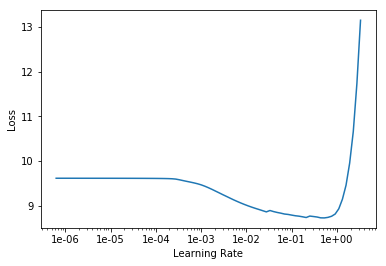

In [29]:
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,5.215199,5.155111,0.218434


In [31]:
learn.save('first', with_opt=True)

In [32]:
learn.load('first', with_opt=True);

In [33]:
learn.unfreeze()

In [34]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.821291,4.968831,0.230557
2,4.733251,4.740776,0.246780
3,4.377739,4.364820,0.293031
4,3.877823,4.030114,0.341245
5,3.652991,3.946535,0.354964


In [35]:
learn.save('second_or_lm', with_opt=True)

In [36]:
learn.load('second_or_lm', with_opt=True);

In [37]:
learn.fit_one_cycle(50, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.410607,3.940806,0.356176
2,3.236152,3.933805,0.357445
3,3.415622,3.921870,0.359300
4,3.413979,3.903940,0.361678
5,3.279636,3.884566,0.364997
6,3.328824,3.861917,0.368683
7,3.227978,3.837148,0.373246
8,3.265952,3.809445,0.378211
9,3.241844,3.779650,0.383241
10,3.182221,3.748941,0.388474


In [38]:
learn.save('third_or_lm', with_opt=True)

In [24]:
learn.load('third_or_lm', with_opt=True);

In [25]:
TEXT = "ଚଳାଚଳ ପାଇଁ"
N_WORDS = 40
N_SENTENCES = 2

In [26]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.5) for _ in range(N_SENTENCES)))

ଚଳାଚଳ ପାଇଁ , ▁ଓଡ଼ିଶା ରୁ ▁ତିଆରି ▁ଏକ ▁ରାଜ୍ୟ ▁। ▁x x b os ▁ ଗ୍ରେଗୋରୀ ▁ପାଞ୍ଜି ▁ଅନୁସାରେ ▁୨୨ ▁ସେପ୍ଟେମ୍ବର ▁ବର୍ଷର ▁୨ ୮୩ ତମ ▁ଦିବସ ▁ଅଟେ ▁। ▁ବର୍ଷ ▁ଶେଷ ▁ହେବା ▁ପାଇଁ ▁ଆଉ ▁୧ ୧୬ ▁ଦିନ ▁ବାକି ▁ଅଛି ▁। ▁x x b os ▁
ଚଳାଚଳ ପାଇଁ , ▁ରାଜ୍ୟ ରେ ▁ଜଣେ ▁ଭାରତୀୟ ▁ସମାଜ ▁ସଂସ୍କାରକ , ▁କବି , ▁ଲେଖକ , ▁ରାଜନେତା ▁ଓ ▁ଲେଖକ ▁ଥିଲେ ▁। ▁ସେ ▁ଓଡ଼ିଶାର ▁ବ୍ରହ୍ମପୁର ଠାରେ ▁ଜନ୍ମ ▁ଗ୍ରହଣ ▁କରିଥିଲେ ▁। ▁ସେ ▁ରେଭେନ୍ସା ▁ମହାବିଦ୍ୟାଳୟରୁ ▁ସ୍ନାତକ ▁ଓ ▁ସତ୍ୟବାଦୀ ▁ବିଶ୍ୱବିଦ୍ୟାଳୟରୁ ▁ସ୍ନାତକୋତ୍ତର ▁ଶିକ୍ଷା ▁ସମାପ୍ତ ▁କରିଥିଲେ ▁। ▁ପରେ ▁ସେ ▁ବାଲେଶ୍ୱର


In [43]:
np.exp(3.28)

26.575772699873955

In [27]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()

In [10]:
# Generating embedding vectors for visualization

In [11]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-odia/language-model')

In [12]:
defaults.device = torch.device('cpu')

In [14]:
learn = load_learner(path / 'OriyaDataset/')

In [15]:
encoder = get_model(learn.model)[0]

In [16]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([15000, 400])

In [17]:
embeddings = encoder.state_dict()['encoder.weight']

In [18]:
embeddings = np.array(embeddings)

In [19]:
embeddings[0].shape

(400,)

In [20]:
df = pd.DataFrame(embeddings)

In [21]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.278337,0.569020,0.223832,-0.422061,0.132889,-0.276127,-0.541155,0.031630,0.684908,0.304360,...,0.762421,0.140276,-0.179777,-0.318481,-0.320415,0.071183,-0.198211,0.546749,0.098809,0.135686
1,-0.379997,0.407320,0.317872,0.285017,0.241357,-0.656816,0.257246,0.158912,-0.569035,0.339018,...,-0.251471,-0.261727,0.435868,0.303229,-0.430179,-0.087465,-0.236553,0.333553,0.237872,-0.265241
2,-0.291019,0.399399,0.320232,0.284396,0.274640,-0.717470,0.173732,0.150757,-0.603101,0.388835,...,-0.278470,-0.297099,0.356707,0.262559,-0.421791,-0.080075,-0.249360,0.365584,0.271975,-0.352460
3,0.690676,0.407454,0.394854,-0.231615,-0.355270,0.340456,-1.542299,-0.177419,-1.021559,-0.669190,...,1.378690,-0.817232,0.364302,0.338585,-0.133476,1.850777,0.340457,0.052524,-0.905898,0.470041
4,-0.770581,0.187053,-0.221099,0.071302,0.089253,-0.106463,-0.602398,0.260754,0.615542,0.470804,...,-0.018236,-0.295744,-0.864225,-0.383948,0.806597,-0.025214,-0.496939,-0.069128,0.108977,0.347822


In [22]:
df.shape

(15000, 400)

In [23]:
df.to_csv('embeddings.tsv', sep='\t', index=False, header=False)

In [24]:
df2 = pd.DataFrame(itos)

In [25]:
df2.head()

,0
0,<unk>
1,<s>
2,</s>
3,▁।
4,▁


In [26]:
df2.shape

(15000, 1)

In [27]:
df2.to_csv('embeddings_metadata.tsv', sep='\t', index=False, header=False)

In [28]:
encoder.state_dict()['encoder.weight'][1]

tensor([-0.3800,  0.4073,  0.3179,  0.2850,  0.2414, -0.6568,  0.2572,  0.1589,
        -0.5690,  0.3390,  0.2660,  0.3885, -0.5384,  0.9321, -1.0655,  0.4361,
        -0.1560, -0.4131, -0.0708,  0.3348,  0.7178,  0.0712, -0.0704,  0.1688,
        -0.3826,  0.1960,  0.0754, -0.1111, -0.2914,  0.2802, -0.3679,  0.0159,
        -0.2364, -0.2667, -0.4064, -0.2724, -0.6792, -0.2173, -0.3283, -0.0353,
        -0.1337,  0.1595, -0.4751, -0.3926, -0.1481,  0.1773, -0.3358,  0.8544,
        -0.2279,  0.3886, -0.3867,  0.3424,  0.3252, -1.4398, -0.2734, -0.5911,
         0.0355, -0.7232,  0.6876, -0.5088, -0.2888,  1.0245, -0.5223,  0.0054,
        -0.6169, -0.1098, -1.3749, -0.5966,  0.2348, -0.3014,  0.1869,  0.4626,
        -0.4302, -0.2626,  0.0763, -0.1393, -0.5008, -0.2600,  0.4360,  0.0578,
        -0.7720,  0.9783,  0.0946,  0.3976, -0.3268,  0.5163, -0.3105, -0.2339,
        -0.4461,  0.4179,  0.6228, -0.6743, -0.2468, -0.0193,  0.2067, -0.6244,
         0.3218, -0.5876,  0.9900, -0.09